# Deep Learning - 1

## Chapter 2: Multiple inputs Neural Network

### Building muilptiple inputs Neural Network

---------------

### Import

In [1]:
import numpy as np

<img src="Images/Data.PNG" alt="Drawing" style="width: 400px;"/>

### Data

In [2]:
dataset = np.array([[30., 2.],  
                    [25., 1.],
                    [27., 3.]])
tourists = np.array([1, 2, 1])
dataset.shape

(3, 2)

### Data preprocessing

In [ ]:
means = np.mean(dataset, axis=0)
stdevs = np.std(dataset, axis=0)

def standard_normalize(dataset, means, stdevs):
    """Normalizing each value by using zsocre method"""
    for row in dataset:
        for i in range(len(row)):
            row[i] = (row[i] - means[i]) / stdevs[i]
standard_normalize(dataset, means, stdevs)

In [ ]:
print(dataset)

In [3]:
minmax = np.array([dataset.min(axis=0), dataset.max(axis=0)])
minmax = minmax.T
minmax

array([[25., 30.],
       [ 1.,  3.]])

In [4]:
def minmax_normalize(dataset, minmax):
    """Normalizing each value by using minmax method"""
    for row in dataset:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
minmax_normalize(dataset, minmax)

In [5]:
print(dataset)

[[1.  0.5]
 [0.  0. ]
 [0.4 1. ]]


<img src="Images/Model.PNG" alt="Drawing" style="width: 400px;"/>

### Model

In [6]:
def neural_network(input: 'vector', weigth: 'vector', bias: float) -> 'vector':
    """
    Multiple inputs neural network
    It multiplies the inputs by the weights and then sums them.
    """
    output = input.dot(weigth) + bias
    return output

### Parameters

In [7]:
weights = np.random.rand(2)
bias = 0
print(f'weight: {weights} bias: {bias}')

weight: [0.54564979 0.47014159] bias: 0


### Hyperparameters

In [8]:
epoch = 300
alpha = 0.1
batch_size = 3

### Optimizing the parameters

In [9]:
for iteration in range(epoch):
    error = 0
    for i in range(int(len(dataset) / batch_size)):
        batch_start = i * batch_size
        batch_end = (i+1) * batch_size
        
        input = dataset[batch_start:batch_end]
        true = tourists[batch_start:batch_end]

        prediction = neural_network(input, weights, bias)
        
        #MSE
        error += np.sum((prediction - true) ** 2 / len(dataset))
        
        #Stochastic gradient descent
        # w_new = w_old - 2 * alpha * (pred - true) * input
        # b_new = b_old - 2 * alpha * (pred - true)
        delta = (prediction - true) / batch_size #Direction
        weights_delta = delta.dot(input) * alpha  #Weight Amount
        bias_delta = np.sum(delta) * alpha #Bias Amount
        
        weights -= weights_delta
        bias -= bias_delta
        
        print(f'Таамаг: {prediction}\tҮнэн утга: {true}',
              f'\nWeight: {weights} \tWeight өөрчлөлт: {weights_delta}',
              f'\nBias: {bias} \tBias өөрчлөлт: {bias_delta}')
    print(f'Давталт: {iteration} \tНийт алдаа: {error}\n')
print(f'\nWeight: {weights} and Bias: {bias}')

Таамаг: [0.78072058 0.         0.68840151]	Үнэн утга: [1 2 1] 
Weight: [0.55711375 0.48418286] 	Weight өөрчлөлт: [-0.01146396 -0.01404127] 
Bias: 0.08436259697485815 	Bias өөрчлөлт: -0.08436259697485815
Давталт: 0 	Нийт алдаа: 1.3817256944562117

Таамаг: [0.88356778 0.0843626  0.79139096]	Үнэн утга: [1 2 1] 
Weight: [0.56377628 0.49307704] 	Weight өөрчлөлт: [-0.00666253 -0.00889417] 
Bias: 0.15905188576285242 	Bias өөрчлөлт: -0.07468928878799427
Давталт: 1 	Нийт алдаа: 1.2422469510976812

Таамаг: [0.96936668 0.15905189 0.87763943]	Үнэн утга: [1 2 1] 
Weight: [0.56642886 0.49766628] 	Weight өөрчлөлт: [-0.00265258 -0.00458924] 
Bias: 0.2255166191200569 	Bias өөрчлөлт: -0.06646473335720449
Давталт: 2 	Нийт алдаа: 1.1350001560148189

Таамаг: [1.04077862 0.22551662 0.94975444]	Үнэн утга: [1 2 1] 
Weight: [0.56573952 0.49866148] 	Weight өөрчлөлт: [ 0.00068935 -0.00099521] 
Bias: 0.2849816298028246 	Bias өөрчлөлт: -0.059465010682767674
Давталт: 3 	Нийт алдаа: 1.0509929270308336

Таамаг: [1.10

Таамаг: [1.02873872 1.88011248 1.03698508]	Үнэн утга: [1 2 1] 
Weight: [-0.53871367 -0.62993419] 	Weight өөрчлөлт: [0.00145109 0.00171181] 
Bias: 1.8819179411269886 	Bias өөрчлөлт: -0.0018054572677079037
Давталт: 171 	Нийт алдаа: 0.00552227551854117

Таамаг: [1.02823718 1.88191794 1.03649828]	Үнэн утга: [1 2 1] 
Weight: [-0.54014155 -0.63162142] 	Weight өөрчлөлт: [0.00142788 0.00168723] 
Bias: 1.8836961610111587 	Bias өөрчлөлт: -0.0017782198841701437
Давталт: 172 	Нийт алдаа: 0.005357611868137322

Таамаг: [1.0277439  1.88369616 1.03601812]	Үнэн утга: [1 2 1] 
Weight: [-0.54154659 -0.63328442] 	Weight өөрчлөлт: [0.00140504 0.001663  ] 
Bias: 1.8854475549052274 	Bias өөрчлөлт: -0.0017513938940687535
Давталт: 173 	Нийт алдаа: 0.005197870688575875

Таамаг: [1.02725875 1.88544755 1.0355445 ]	Үнэн утга: [1 2 1] 
Weight: [-0.54292914 -0.63492355] 	Weight өөрчлөлт: [0.00138255 0.00163913] 
Bias: 1.887172527984017 	Bias өөрчлөлт: -0.0017249730787895824
Давталт: 174 	Нийт алдаа: 0.00504290457365

In [10]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


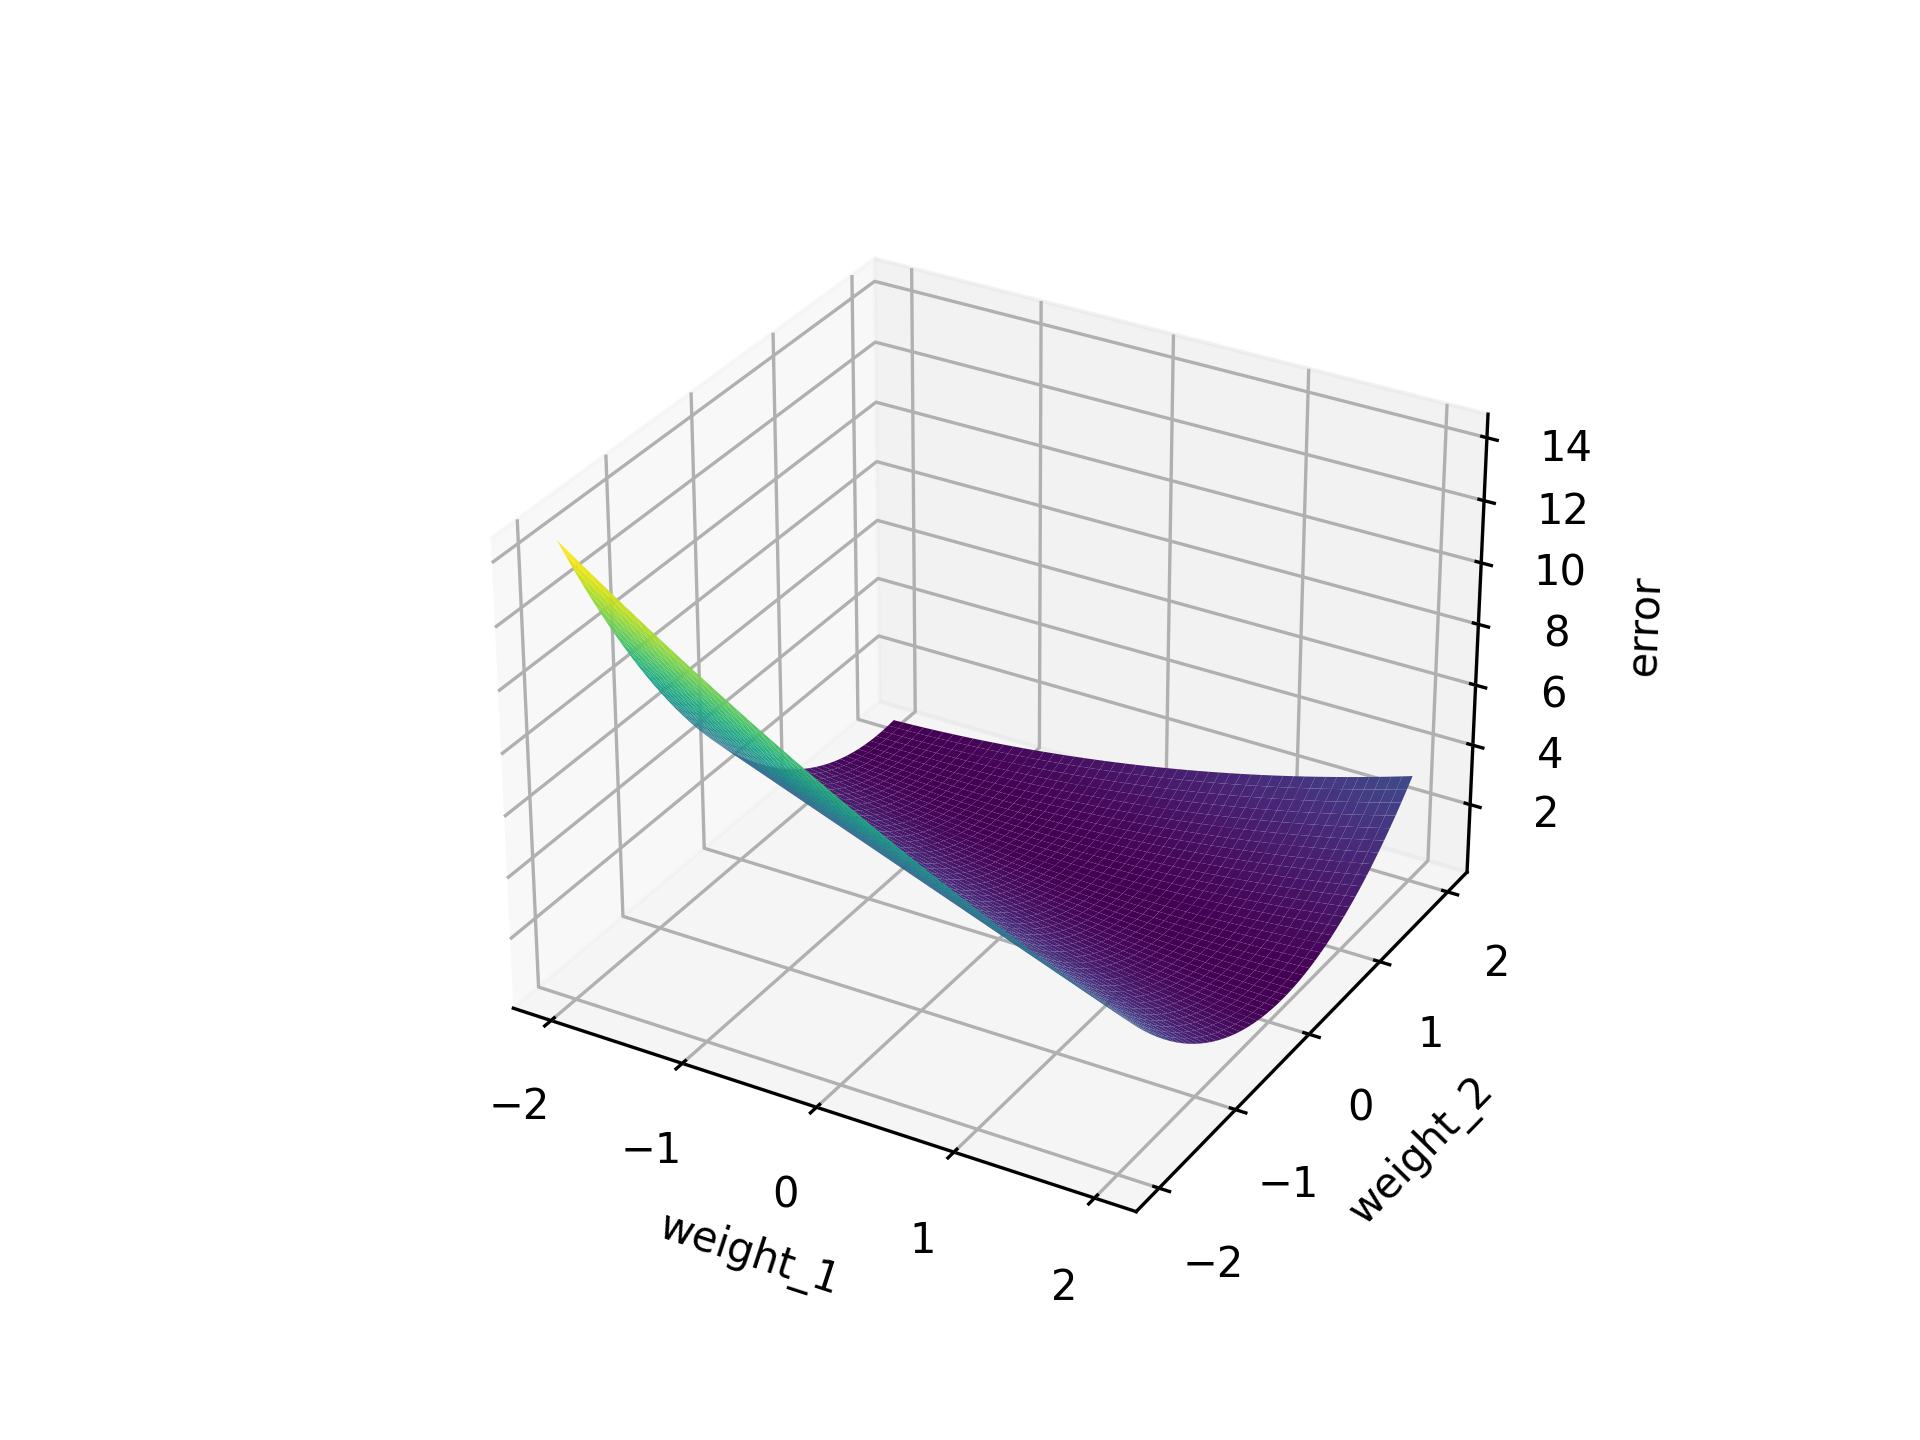

Text(0.5, 0, 'error')

In [11]:
day = 2
x = np.linspace(-2,2,1000)

X, Y = np.meshgrid(x, x)

#error = (input_1 * weight_1 + input_2 * weight_2 - true) ** 2
Z = (dataset[day][0] * X + dataset[day][1] * Y - tourists[day]) ** 2
# y = neural_network(x, weight, bias)

fig1 = plt.figure()
ax =  fig1.add_subplot(projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('weight_1')
ax.set_ylabel('weight_2')
ax.set_zlabel('error')

In [12]:
print(dataset)

[[1.  0.5]
 [0.  0. ]
 [0.4 1. ]]


### Usage

In [15]:
test_dataset = np.array([[20., 5.],
                         [18., 4.]])
minmax_normalize(test_dataset, minmax)
test_prediction = neural_network(test_dataset, weights, bias)
print(f'Таамаг: {test_prediction}')

Таамаг: [1.13976228 1.75091423]
